In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

In [2]:
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]

In [3]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

In [4]:
tsne = TSNE(random_state=42)
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


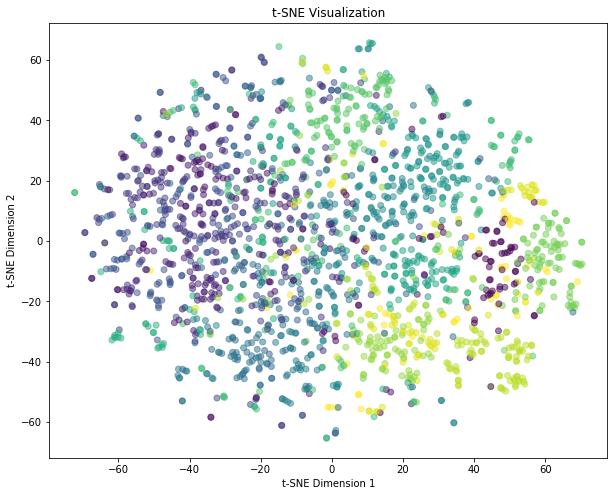

In [5]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [9]:
k_clusters = 3
kmeans = KMeans(n_clusters=k_clusters, random_state=42)
labels_pred = kmeans.fit_predict(tsne_result)

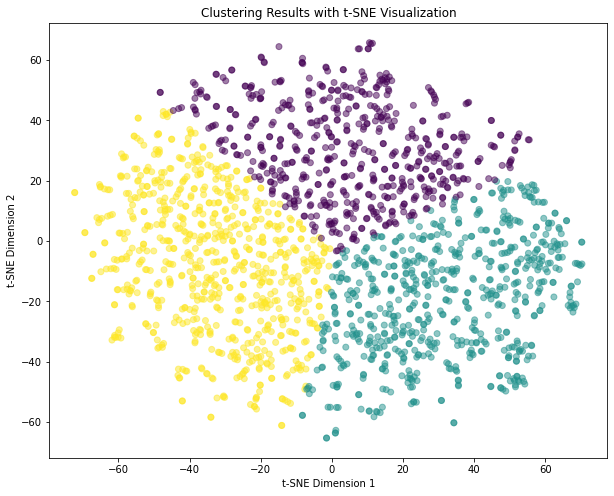

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels_pred, cmap='viridis', alpha=0.5)
plt.title('Clustering Results with t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [11]:
from sklearn.metrics import accuracy_score, adjusted_rand_score, normalized_mutual_info_score

accuracy = accuracy_score(labels, labels_pred)
ari = adjusted_rand_score(labels, labels_pred)
nmi = normalized_mutual_info_score(labels, labels_pred)

print(f"Accuracy: {accuracy}")
print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")

Accuracy: 0.0565
Adjusted Rand Index: 0.08104602128052363
Normalized Mutual Information: 0.21263559896161488
